### csv 파일을 로드해서 결함
1. csv 폴더에 transaction_1, transaction_2, transaction_detail_1, transaction_detail_2 파일 4개를 로드
2. transaction_1, transaction_2 데이터프레임을 단순한 행 결합
3. transaction_detail_1, transaction_detail_2 데이터프레임도 단순한 행 결합
4. 2번 과정에서 나온 데이터 프레임과 3번과정에서 나온 데이터 프레임을 특정 조건을 가지고 열 결합


In [1]:
import pandas as pd

In [2]:
transaction_1 = pd.read_csv("../csv/transaction_1.csv")
transaction_2 = pd.read_csv("../csv/transaction_2.csv")
transaction_detail_1 = pd.read_csv("../csv/transaction_detail_1.csv")
transaction_detail_2 = pd.read_csv("../csv/transaction_detail_2.csv")


In [5]:
transaction_1

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
4995,T0000005108,210000,2019-06-15 02:42:41,HD315748
4996,T0000005109,150000,2019-06-15 03:36:16,HI215420
4997,T0000005110,50000,2019-06-15 03:44:06,IK880102
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758


In [6]:
transaction_detail_1

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
4995,4995,T0000004865,S003,1
4996,4996,T0000004866,S001,3
4997,4997,T0000004867,S001,3
4998,4998,T0000004868,S005,1


In [8]:
transaction = pd.concat([transaction_1,transaction_2], axis = 'rows', ignore_index= True)

In [9]:
transaction_detail =pd.concat([transaction_detail_1,transaction_detail_2], axis = 'rows', ignore_index=True)

In [10]:
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [11]:
transaction_detail

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


In [12]:
#특정조건을 가지고 열 결합
join_data = pd.merge(transaction, transaction_detail, on = "transaction_id", how = "inner")

In [13]:
join_data

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


In [16]:

join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])

join_data.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


## 데이터 결합
1. customer_master, item_master 파일로드
2. join_data 특정 조건에 맞게 열 추가
3. 결합이 된 데이터에서 quantity 컬럼, item_price컬럼 존재 두개의 곱을 하여 새로운 파생변수 total_price 생성
4. 6개의 csv파일이 결합된 데이터프레임에 payment_date 컬럼의 값을 가지고 payment_month 새로운 파생변수에 들어갈 값은 년-월
5. payment_month 을 기준으로 그룹화 total price 합
6. 시각화

In [17]:
customer_master = pd.read_csv("../csv/customer_master.csv")
item_master= pd.read_csv("../csv/item_master.csv")

In [19]:
customer_master

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시
...,...,...,...,...,...,...,...,...
4995,AS677229,정우석,2019-07-31 16:52,hirayama_risa@example.com,F,77,1941-10-17,대전광역시
4996,HD758694,정영훈,2019-07-31 19:09,nakahara_mahiru@example.com,F,27,1991-11-13,광주광역시
4997,PL538517,정준기,2019-07-31 19:30,tabata_yuu1@example.com,F,73,1945-12-28,대전광역시
4998,OA955088,정도형,2019-07-31 22:32,setouchi_hikaru@example.com,F,75,1944-04-09,부산광역시


In [20]:
item_master

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [22]:
join_data

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


In [24]:
join_data = pd.merge(join_data, customer_master, on = "customer_id", how = "inner") 

In [25]:
join_data

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,T0000000162,50000,2019-02-02 18:23:27,PL563502,49,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
2,T0000000235,50000,2019-02-04 19:53:45,PL563502,127,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
3,T0000006088,50000,2019-07-10 10:48:25,PL563502,6291,S001,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
4,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006881,85000,2019-07-31 14:19:05,AS976422,7125,S002,1,최은소,2019-07-07 0:16,maeda_tamaki@example.com,F,68,1951-07-12,서울특별시
7140,T0000006882,200000,2019-07-31 14:46:46,HD030302,7126,S001,4,정진우,2019-07-17 22:19,kusumoto_ryuunosuke@example.com,M,48,1971-02-27,부산광역시
7141,T0000006887,210000,2019-07-31 19:43:42,AS961301,7132,S005,1,정민승,2019-07-29 23:10,yasunaga_kimiko@example.com,F,58,1960-08-20,광주광역시
7142,T0000006890,120000,2019-07-31 20:25:02,AS554975,7135,S003,1,정하진,2019-07-20 9:09,ookawa_jin@example.com,M,25,1993-12-08,서울특별시


In [26]:
join_data = pd.merge(join_data, item_master, on = "item_id", how = "inner") 

In [27]:
join_data

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006815,120000,2019-07-30 01:01:27,HI009305,7055,S003,1,정건,2019-07-20 13:11,suwa_kei@example.com,M,27,1992-07-07,인천광역시,PC-C,120000
7140,T0000006825,120000,2019-07-30 05:07:00,TS344882,7066,S003,1,이세림,2019-03-13 10:42,naruse_rio@example.com,F,66,1952-11-09,인천광역시,PC-C,120000
7141,T0000006835,240000,2019-07-30 11:08:09,HI555356,7078,S003,2,최유영,2019-06-26 17:54,fujiki_teppei@example.com,M,73,1946-03-06,부산광역시,PC-C,120000
7142,T0000006840,120000,2019-07-30 12:50:49,PL361201,7083,S003,1,최려원,2019-06-14 13:51,hayakawa_jin@example.com,M,42,1977-03-12,서울특별시,PC-C,120000


In [30]:
join_data["total_price"] = join_data["quantity"] * join_data["item_price"]

In [32]:
#ㅔjoin_data

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006815,120000,2019-07-30 01:01:27,HI009305,7055,S003,1,정건,2019-07-20 13:11,suwa_kei@example.com,M,27,1992-07-07,인천광역시,PC-C,120000,120000
7140,T0000006825,120000,2019-07-30 05:07:00,TS344882,7066,S003,1,이세림,2019-03-13 10:42,naruse_rio@example.com,F,66,1952-11-09,인천광역시,PC-C,120000,120000
7141,T0000006835,240000,2019-07-30 11:08:09,HI555356,7078,S003,2,최유영,2019-06-26 17:54,fujiki_teppei@example.com,M,73,1946-03-06,부산광역시,PC-C,120000,240000
7142,T0000006840,120000,2019-07-30 12:50:49,PL361201,7083,S003,1,최려원,2019-06-14 13:51,hayakawa_jin@example.com,M,42,1977-03-12,서울특별시,PC-C,120000,120000


In [41]:
#payment month 새로운 파생변수 생성 --> payment_date에서 년과 월만 추출해서 값을 삽입
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y-%m")
join_data.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,2019-02
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000,2019-04
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000,2019-04
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,2019-02
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,2019-02


In [42]:
## payment_month 기준으로 그룹화 하여서 total_price의 합을 추출 --> 시각화
group_data = join_data.groupby("payment_month").sum()["total_price"]
group_data

payment_month
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: total_price, dtype: int64

In [43]:
import matplotlib.pyplot as plt

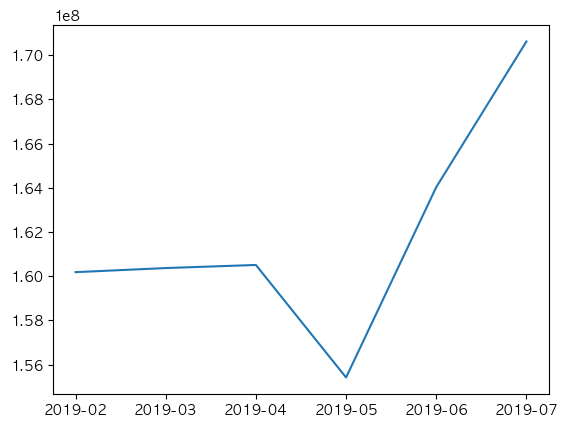

In [44]:
from matplotlib import font_manager, rc
rc('font', family='AppleGothic') # 애플용
plt.rcParams['axes.unicode_minus'] = False #애플용


plt.plot(group_data)
plt.show()